In [1]:
#det her er den udgave med det cleanede data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\astri\AppData\Local\Temp\ipykernel_1484\663791057.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#X = np.load("X_tfidf.npy", allow_pickle=True)

In [2]:
y = (pd.read_csv("large_dataset_cleaned.csv"))["type"]
print(len(y))

C:\Users\astri\AppData\Local\Temp\ipykernel_1484\93762790.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  y = (pd.read_csv("large_dataset_cleaned.csv"))["type"]


995000


In [3]:
X = pd.read_pickle("content_preprocessed.pkl")
print(len(X))

In [ ]:
data = pd.DataFrame(y).join(pd.DataFrame(X))

In [ ]:
relevant = set(["reliable","conspiracy","fake"])
data = data = data[data["type"].isin(relevant) == True]

In [ ]:
print(len(data))
def fun(doc):
   return doc

vectorizer = TfidfVectorizer(
    tokenizer=fun,
    preprocessor=fun,
    token_pattern=None)  

420761


In [17]:
print(data[0].head())

1     [cost, senat, bank, committe, jp, morgan, buy,...
3     [julia, geist, ask, draw, pictur, comput, scie...
4     [number, compil, studi, vaccin, danger, activi...
5     [spend, major, wake, hour, stare, content, com...
11    [republican, privat, medicar, make, day, sen, ...
Name: 0, dtype: object


In [ ]:
print("vectorize")
X = vectorizer.fit_transform(data[0])
print(X.shape)

vectorize
(420761, 955247)


In [ ]:
data.to_pickle("final_clean_data")

MemoryError: 

In [ ]:
def bin_target(x):
    if x=="reliable":
        return 0
    if x=="fake" or x=="reliable":
        return 1

y = data["type"].apply(lambda x:bin_target(x)).astype(int)

X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5,random_state=0,shuffle=True) 

TypeError: Singleton array array(<420761x955247 sparse matrix of type '<class 'numpy.float64'>'
	with 60441496 stored elements in Compressed Sparse Row format>,
      dtype=object) cannot be considered a valid collection.

In [ ]:
#reproducible
#clf = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2).fit(X_train, y_train)
#clf.score(X_val,y_val)

In [ ]:
model = MLPClassifier(random_state=1, max_iter=1,tol=0.1,n_iter_no_change=2,early_stopping=True)
distributions = dict(hidden_layer_sizes=[(50,50,50),(20,20,20,20,20),(100,100,100)],activation=["logistic", "tanh", "relu"])
get_best = RandomizedSearchCV(model, distributions, random_state=1)
search = get_best.fit(X_train, y_train)
search.best_params_


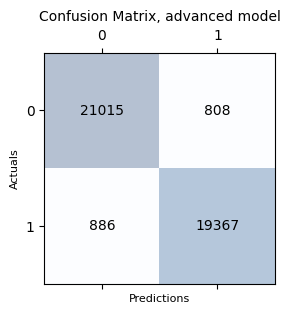

In [ ]:
#evaluation
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_true=y_val,y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
 
plt.xlabel('Predictions', fontsize=8)
plt.ylabel('Actuals', fontsize=8)
plt.title('Confusion Matrix, advanced model', fontsize=10)
plt.show()


In [ ]:
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Precision:", precision)
print("Recall:", recall)

accuracy: 0.9597395189656811
F1: 0.9580983476798258
Precision: 0.9599504337050806
Recall: 0.9562533945588307


In [ ]:
model = MLPClassifier(random_state=1, max_iter=1,verbose=True,tol=0.01,n_iter_no_change=3,early_stopping=True)
clf = GridSearchCV(model,{"hidden_layer_sizes":((50,50,50),(20,20,20,20,20),(50,)),"activation":"‘identity’, ‘logistic’, ‘tanh’, ‘relu’"}, scoring='f1', cv=5)
clf.fit(X_train,y_train)

Evaluation on Fake news test-set

In [ ]:
bestmodel = clf
def evaluate(model, name):
    print(f"evaluating {name}")
    y_pred = model.predict(X_test)
    print("accuracy:", accuracy_score(y_pred,y_test))
    print("F1:", f1_score(y_pred,y_test))
    precision = precision_score(y_val, y_test)
    recall = recall_score(y_val, y_test)
    print("Precision:", precision)
    print("Recall:", recall)
    cm = confusion_matrix(y_true=y_test,y_pred=y_test)
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(2):
        for j in range(2):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
    plt.xlabel('Predictions', fontsize=8)
    plt.ylabel('Actuals', fontsize=8)
    plt.title(f'Confusion Matrix, {name}', fontsize=10)
    plt.show()

In [ ]:
evaluate(bestmodel, "advanced model")

In [ ]:
#getting baseline for same dataset: logistic regression where x is length of article
X_len_train = pd.DataFrame(X_train["content"].apply(lambda x: len(x))) #get feature with length of article
X_len_val = pd.DataFrame(X_val["content"].apply(lambda x: len(x))) #get X for validation

baseline = LogisticRegression()
reg = baseline.fit(X_len_train,y_train)

y_pred = baseline.predict(X_len_val) #er det test eller validation?
acc = accuracy_score(y_pred,y_val)

print(acc)

In [ ]:
evaluate(baseline, "baseline")

Evaluation on the LIAR dataset

In [ ]:
liar = pd.concat([pd.read_csv("train.tsv", sep="\t",header=None),pd.read_csv("test.tsv", sep="\t",header=None),pd.read_csv("valid.tsv", sep="\t",header=None)])



In [ ]:
print(len(liar))
print(liar[1].value_counts())
print(liar.head())

12791
1
half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: count, dtype: int64
           0            1                                                  2   \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                                   3               4                     5   \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    bl

In [ ]:
true = set(["half-true","mostly-true","barely-true","true"])
false = set(["false","pants-fire"])
def get_bin_y_liar(x):
    if x in true:
        return 0
    if x in false:
        return 1
    
y_test = liar[1]
X_test = liar[2]

In [ ]:
evaluate(bestmodel, "advanced model")

In [ ]:
evaluate(baseline, "baseline")